# Data exploration

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd
import os
import torch
from scipy.io import wavfile
import torchaudio
from audiosep.io import load_audio_tensor

In [15]:
idx = 5
root = "../data/train_small/"

example_dirs = sorted(
    d for d in os.listdir(root)
    if os.path.isdir(os.path.join(root, d))
)

print(f"Nombre d'exemples dans le jeu de données : {len(example_dirs)}")

folder = example_dirs[idx]
folder_path = os.path.join(root, folder)

# filenames
mix_file = [f for f in os.listdir(folder_path) if f.startswith("mix")][0]
mix_path   = os.path.join(folder_path, mix_file)
voice_path = os.path.join(folder_path, "voice.wav")
noise_path = os.path.join(folder_path, "noise.wav")

mix, sr_mix  = load_audio_tensor(mix_path, to_numpy=True, target_sample_rate=6400)
voice, sr_voice = load_audio_tensor(voice_path, to_numpy=True, target_sample_rate=6400)
noise, sr_noise = load_audio_tensor(noise_path, to_numpy=True, target_sample_rate=6400)

# Sanity check sample rates<
print(f"Mix:   {mix.shape[1]} samples, {sr_mix} Hz, duration {mix.shape[0]/sr_mix:.2f}s")
print(f"Voice: {voice.shape[1]} samples, {sr_voice} Hz, duration {voice.shape[0]/sr_voice:.2f}s")
print(f"Noise: {noise.shape[1]} samples, {sr_noise} Hz, duration {noise.shape[0]/sr_noise:.2f}s") 


# Listen to each signal in the notebook
import IPython.display as ipd
print("Mix:")
ipd.display(ipd.Audio(mix, rate=sr_mix))
print("Voice (clean):")
ipd.display(ipd.Audio(voice, rate=sr_voice))
print("Noise:")
ipd.display(ipd.Audio(noise, rate=sr_noise))  

Nombre d'exemples dans le jeu de données : 50
Mix:   64000 samples, 6400 Hz, duration 0.00s
Voice: 64000 samples, 6400 Hz, duration 0.00s
Noise: 64000 samples, 6400 Hz, duration 0.00s
Mix:


Voice (clean):


Noise:


In [14]:
idx = 5
root = "../data/train_small/"

example_dirs = sorted(
    d for d in os.listdir(root)
    if os.path.isdir(os.path.join(root, d))
)

print(f"Nombre d'exemples dans le jeu de données : {len(example_dirs)}")

folder = example_dirs[idx]
folder_path = os.path.join(root, folder)

# filenames
mix_file = [f for f in os.listdir(folder_path) if f.startswith("mix")][0]
mix_path   = os.path.join(folder_path, mix_file)
voice_path = os.path.join(folder_path, "voice.wav")
noise_path = os.path.join(folder_path, "noise.wav")

def load_wav_audio(path):
    """Read WAV, convert to float32 in [-1, 1], return (sr, mono_signal)."""
    sr, data = wavfile.read(path)
    data = np.asarray(data).astype(np.float32)
    return sr, data

# Load mix, voice (clean) and noise
sr_mix, mix = load_wav_audio(mix_path)
sr_voice, voice = load_wav_audio(voice_path)
sr_noise, noise = load_wav_audio(noise_path)

# Sanity check sample rates
print(f"Mix:   {mix.shape[0]} samples, {sr_mix} Hz, duration {mix.shape[0]/sr_mix:.2f}s")
print(f"Voice: {voice.shape[0]} samples, {sr_voice} Hz, duration {voice.shape[0]/sr_voice:.2f}s")
print(f"Noise: {noise.shape[0]} samples, {sr_noise} Hz, duration {noise.shape[0]/sr_noise:.2f}s")

# Listen to each signal in the notebook
import IPython.display as ipd
print("Mix:")
ipd.display(ipd.Audio(mix, rate=sr_mix))
print("Voice (clean):")
ipd.display(ipd.Audio(voice, rate=sr_voice))
print("Noise:")
ipd.display(ipd.Audio(noise, rate=sr_noise))

Nombre d'exemples dans le jeu de données : 50
Mix:   80000 samples, 8000 Hz, duration 10.00s
Voice: 80000 samples, 8000 Hz, duration 10.00s
Noise: 80000 samples, 8000 Hz, duration 10.00s
Mix:


Voice (clean):


Noise:


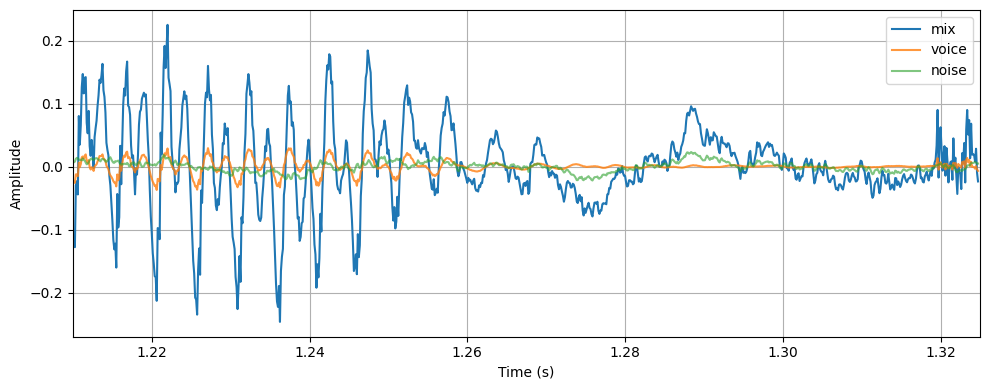

In [8]:
start_time = 1.21
end_time = 1.325

# ensure same sample rate/length and trim to shortest
min_len = min(len(mix), len(voice), len(noise))
mix = mix[:min_len]
voice = voice[:min_len]
noise = noise[:min_len]

# start sample (uses common sr_mix)
start_sample = int(start_time * sr_mix)
# remaining seconds available from start
max_seconds_available = (min_len - start_sample) / sr_mix
length_seconds = min(end_time - start_time, max_seconds_available)
n = int(length_seconds * sr_mix)

# common time axis for plotted window
t = np.arange(n) / sr_mix + start_time

plt.figure(figsize=(10,4))
plt.plot(t, mix[start_sample:start_sample + n], label="mix")
plt.plot(t, voice[start_sample:start_sample + n], alpha=0.8, label="voice")
plt.plot(t, noise[start_sample:start_sample + n], alpha=0.6, label="noise")
plt.xlim(start_time, start_time + length_seconds)
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()